# Linear Regression without Sklearn

In [1]:
# Importing required libraries
from sklearn import datasets
import pandas as pd

In [2]:
# Load Boston Dataset from Sklearn
boston = datasets.load_boston()

In [3]:
# Viewing the instructions for the Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Convert the dataset into Pandas Dataframe
df_features = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [5]:
# View the df
df_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Convert the MEDV column to a df
df_target = pd.DataFrame(data=boston.target, columns=['PRICE'])

In [7]:
# Concatenate both the dataframes (this would help in finding the correlation between the features)
df = pd.concat([df_features, df_target], axis=1)

In [8]:
# View the new df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Checking for the details of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# Viewing the Statistical info of the dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Checking to see if there are any null values
pd.isnull(df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

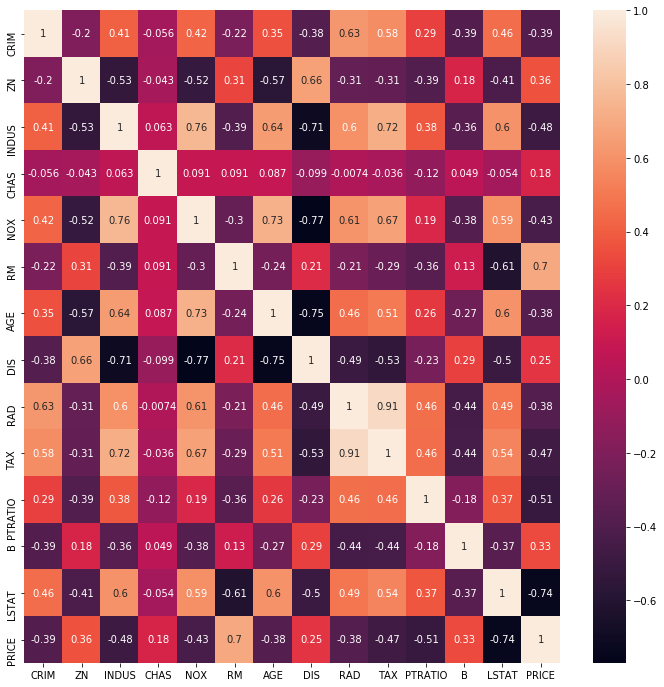

In [12]:
# Importing the libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(12,12))

# Plotting a heatmap for correlation between the features
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'PRICE')

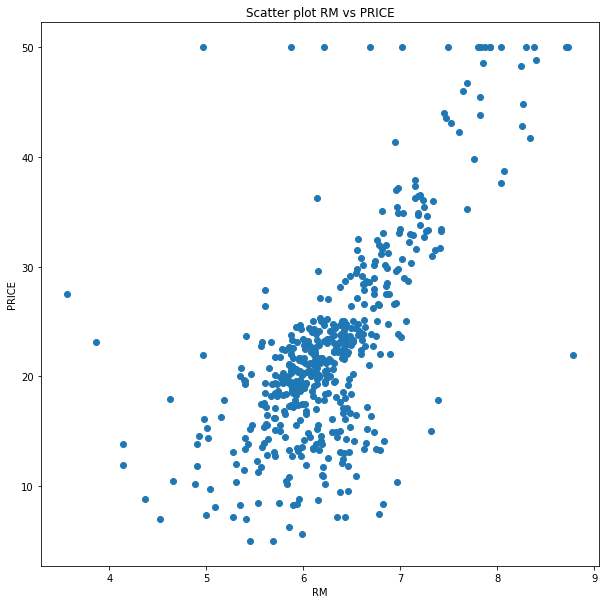

In [13]:
# RM and LSTAT seem to have high correlation with Price or MEDV
# lets plot a scatter plot to see the distribution for each

plt.figure(figsize=(10,10))

#plt.xlabel("RM")
#plt.ylabel = 'Price'
plt.scatter(df['RM'], df['PRICE'])
plt.title('Scatter plot RM vs PRICE')
plt.xlabel("RM")
plt.ylabel("PRICE")

# There seems to be a positive correlation between RM and Price as we figured out from the heatmap

Text(0, 0.5, 'PRICE')

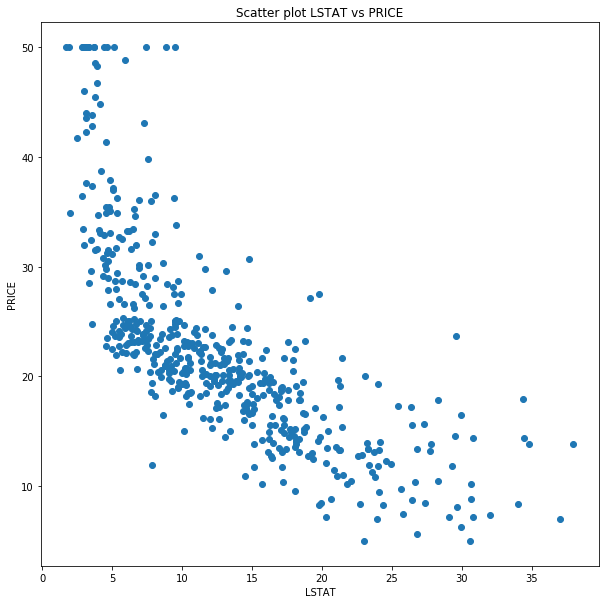

In [14]:
plt.figure(figsize=(10,10))

#plt.xlabel("RM")
#plt.ylabel = 'Price'
plt.scatter(df['LSTAT'], df['PRICE'])
plt.title('Scatter plot LSTAT vs PRICE')
plt.xlabel("LSTAT")
plt.ylabel("PRICE")

# There seems to be a negative correlation between LSTAT and Price as we figured out from the heatmap

### Train Test Split for RM

In [15]:
# Before moving further, it is always a good idea to split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['RM','LSTAT']], df['PRICE'], test_size=0.25)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (379, 2)
X_test:  (127, 2)
y_train:  (379,)
y_test:  (127,)


### Creating a Linear Regression Function

In [16]:
# Before creating a Linear Regression function to predict the values, we must find the values of Theta0 and Theta1
def calculate_theta1(X, y):
    X_mean = X.mean()
    y_mean = y.mean()
    numerator = 0
    denomenator = 0
    theta1 = 0

    for i in range(len(X)):
        numerator += (X.iloc[i] - X_mean)*(y.iloc[i] - y_mean)
        denomenator += (X.iloc[i] - X_mean)**2
        
    theta1 = (numerator/denomenator)
        
    return (theta1, X_mean, y_mean)
        
t1, X_mean, y_mean = calculate_theta1(X_train['RM'], y_train)
t1
print("X_Mean:", X_mean)

X_Mean: 6.293023746701852


In [17]:
# Lets now calculate theta1
def calculate_theta0(X_mean, y_mean, theta0):
    return y_mean - (theta0*X_mean)

t0 = calculate_theta0(X_mean, y_mean, t1)
print(t0)
print(X_mean)
print(y_mean)

-34.79885066047186
6.293023746701852
22.46886543535619


In [18]:
# We now have all the cofficents, lets now calculate the predicted values
import numpy as np
def linear_regression(X, theta0, theta1):
    return theta0 + theta1*X 

y_pred = linear_regression(X_train['RM'], t0, t1)
y_pred

427    21.640532
44     20.430207
252    28.511176
399    18.455465
82     22.550551
         ...    
294    19.884195
97     38.630588
415    23.751776
416    26.918643
73     22.031840
Name: RM, Length: 379, dtype: float64

In [19]:
# Testing on the test set
y_pred_test = linear_regression(X_test['RM'], t0, t1)
y_pred_test

150    20.912517
104    21.322025
481    26.627436
412     7.316832
181    21.112721
         ...    
228    35.145215
132    23.187564
496    14.251177
489    14.469582
484    18.628369
Name: RM, Length: 127, dtype: float64

Text(0, 0.5, 'Price')

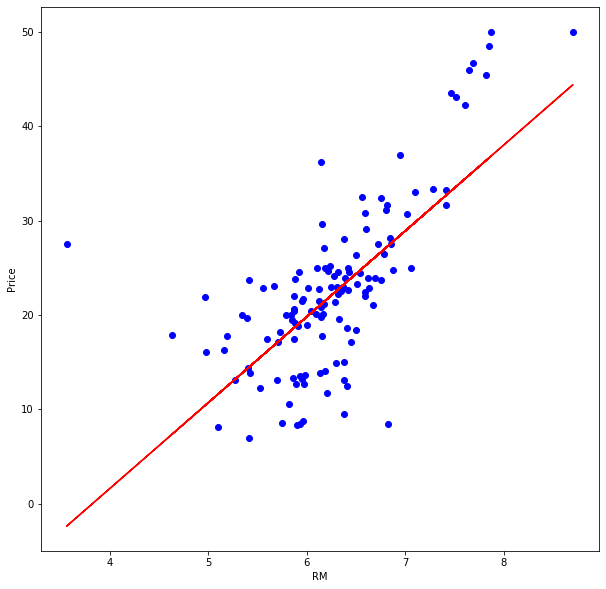

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X_test['RM'], y_test, color='blue')
plt.plot(X_test['RM'], y_pred_test, color='red')
plt.xlabel("RM")
plt.ylabel("Price")

### Mean Squared Errors for RM

In [21]:
# Lets finds out the mean squared errors to see how well the model is doing
def mean_squared_error(y_test, y_pred_test):
    #return (np.sum((y_test - y_pred_test)**2))/len(y_test)
    #return ((y_test - y_pred_test)**2).mean()
    return np.mean((y_test - y_pred_test)**2) 


In [22]:
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred_test), 2))

Mean Squared Error: 41.88


In [23]:
# Lets now find out the R_Squared
y_mean = y_test.mean()
def r_squared(y_test, y_pred_test):
    num = np.sum((y_pred_test - y_mean)**2)
    den = np.sum((y_test - y_mean)**2)
    return num/den

In [24]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [25]:
print("R Squared: ",round(r2_score(y_test, y_pred_test), 2))

R Squared:  0.49


### Verification using Sklearn

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(X_test[['RM']], y_test)
y_pred_test_lr = lr.predict(X_test[['RM']])

In [27]:
print("R Squared: ", round(r2_score(y_test, y_pred_test_lr), 2))
print("Mean Squared Error: ",round(mean_squared_error(y_test, y_pred_test_lr), 2))

R Squared:  0.5
Mean Squared Error:  41.56


Sklearn verifies the R_Squared and Mean Squared Error are approximately the same as what we calculated

# Model for LSTAT

In [28]:
t1, X_mean, y_mean = calculate_theta1(X_train['LSTAT'], y_train)
print(t1)
print(X_mean)
print(y_mean)

-0.9679791338698348
12.522137203166228
22.46886543535619


In [29]:
t0 = calculate_theta0(X_mean, y_mean, t1)
t0

34.59003295947627

In [30]:
y_pred = linear_regression(X_train['LSTAT'], t0, t1)
y_pred

427    20.534976
44     25.345832
252    31.173067
399     5.579698
82     28.085213
         ...    
294    24.523050
97     30.514841
415     6.470239
416     9.625851
73     27.291470
Name: LSTAT, Length: 379, dtype: float64

In [31]:
y_pred_test = linear_regression(X_test['LSTAT'], t0, t1)
y_pred_test

150    20.941527
104    22.654850
481    27.097874
412     1.320590
181    25.442630
         ...    
228    30.795555
132    23.826105
496    14.126954
489    11.387573
484    21.677191
Name: LSTAT, Length: 127, dtype: float64

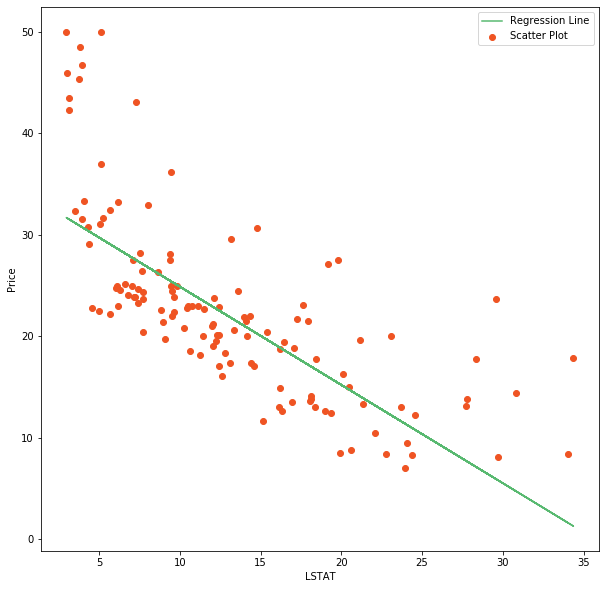

In [32]:
# Lets decorate the plot a little bit by changing colors and adding legends
plt.figure(figsize=(10,10))
plt.scatter(X_test['LSTAT'], y_test, color='#ef5423', label='Scatter Plot')
plt.plot(X_test['LSTAT'], y_pred_test, color='#58b970', label='Regression Line')
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.legend()

In [33]:
print(round(mean_squared_error(y_test, y_pred_test), 2))

40.47


In [34]:
print(round(r_squared(y_test, y_pred_test), 2))

0.6


# Verification using Sklearn

In [35]:
lr2 = LinearRegression()
lr2.fit(X_test[['LSTAT']], y_test)
y_pred_lr2 = lr2.predict(X_test[['LSTAT']])

In [36]:
print("R Squared: ", round(r2_score(y_test, y_pred_lr2), 2))
print("MSE: ", round(mean_squared_error(y_test, y_pred_lr2), 2))

R Squared:  0.52
MSE:  39.68


Sklearn verifies the R_Squared and Mean Squared Error are approximately similar

## Model using both LSTAT and RM (Multiple Linear Regression)

We have to start our cost function with the intial values of 0 for theta

In [38]:
# Lets first vectorize the features and the target
rm = X_train['RM'].values
lstat = X_train['LSTAT'].values
y = y_train.values

# Lets get size of the ndarray
n = len(rm)

In [54]:
# Lets create an array for x0 as per the following formula
# ŷi = theta0*x0 + theta01*x1 + theta02*x2

x0 = np.ones(n)
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [55]:
# Lets create an array for X with two of our features
X = np.array([x0, rm, lstat]).T
X

array([[ 1.   ,  6.202, 14.52 ],
       [ 1.   ,  6.069,  9.55 ],
       [ 1.   ,  6.957,  3.53 ],
       ...,
       [ 1.   ,  6.434, 29.05 ],
       [ 1.   ,  6.782, 25.79 ],
       [ 1.   ,  6.245,  7.54 ]])

In [56]:
# Initializing theta values for all the coefficient with 0
theta = np.array([0,0,0])
theta

array([0, 0, 0])

In [58]:
# calculating y_pred as per the following formula
# Theta.(T)*X (Theta Transport multiplied by X)

y_pred = X.dot(theta)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
# Lets define the cost_function J
def cost_function(y, y_pred):
    return (np.sum((y-y_pred)**2))/len(y)

print(cost_function(y, y_pred))

589.9406596306068


In [60]:
# Finally lets create a gradient descent to improve the cost function and get the values of coefficients
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = y_pred - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(Y, y_pred)
        cost_history[iteration] = cost
        
    return B, cost

In [61]:
newTheta, cost = gradient_descent(X, y, theta,0.0001, 10000)
print(newTheta)
print(cost)

[ 0.65251132  4.81048881 -0.67485367]
30.43892186313349


We have significantly improved the cost function by bringing it down from 589 to 30.

In [62]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [63]:
y_pred = X.dot(newTheta)
print("R Squared: ", round(r2_score(y, y_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y, y_pred),2))

R Squared:  0.64
Mean Squared Error:  30.44


## Verfication using Sklearn

In [64]:
lr3 = LinearRegression()
lr3.fit(X_train[['RM','LSTAT']], y_train)
y_pred_lr3 = lr3.predict(X_train[['RM','LSTAT']])

In [65]:
print("R Squared: ", round(r2_score(y_train, y_pred_lr3), 2))
print("MSE: ", round(mean_squared_error(y_train, y_pred_lr3), 2))

R Squared:  0.64
MSE:  30.43


Sklearn verifies the R_Squared and Mean Squared Error are approximately similar.

The demonstration of Multiple Linear Regression is done with train set data for this demo but can be done with test set as well.